In [66]:
from matplotlib import pyplot as plt, animation, cm, colors
import numpy as np
from numpy import pi

In [67]:
# DO NOT CHANGE THE VALUES IN THIS CELL. The simulation might become unstable.
x0 = 0
xf = 400
y0 = 0
yf = 400
t0 = 0
tf = 320

M = 384  # time steps
N = 401  # space steps

v = 0.5  # wave speed

In [68]:
h = 30  # wavelength
A = 100  # amplitude
T = h/v  # period
d = 40  # distance between sources

b = 0  # friction

print(f'Antinodal lines: {2*np.floor(d/h)+1}')

Antinodal lines: 3.0


In [69]:
def I(x, y):
    """Initial condition"""
    return 0

In [70]:
x, dx = np.linspace(x0, xf, N, retstep=True)
y, dy = np.linspace(y0, yf, N, retstep=True)
t, dt = np.linspace(t0, tf, M, retstep=True)

if v*dt/dx >= 1:
    print(f'WARNING: UNSTABLE SOLUTION:\n\tv={v}; dt={dt}; dx={dx}\n\tv*dt/dx={v*dt/dx}')

In [71]:
u = np.zeros((M, N, N))
for i, x_val in enumerate(x):
    for j, y_val in enumerate(y):
        u[0][i][j] = I(x_val, y_val)
        u[1][i][j] = I(x_val, y_val)

In [72]:
c1 = ((v*dt)**2)
c2 = (dx**2)
c3 = (dy**2)
c4 = 2 + b*dt
c5 = 1 + b*dt
u_ijk = 0

In [73]:
for i in range(1, M-1):

    # Apply drops if needed
    if (i-1) % T == 0:
        x_t = xf//2 - d//2
        y_t = yf//2
        u[i, x_t-2:x_t+2, y_t-2:y_t+2] = A
        x_t = xf//2 + d//2
        y_t = yf//2
        u[i, x_t-2:x_t+2, y_t-2:y_t+2] = A

    # Run the simulation
    u[i+1, 1:N-1, 1:N-1] = (c1*((u[i, 2:N, 1:N-1] - 2*u[i, 1:N-1, 1:N-1] + u[i, 0:N-2, 1:N-1])/c2 + (u[i, 1:N-1, 2:N] - 2*u[i, 1:N-1, 1:N-1] + u[i, 1:N-1, 0:N-2])/c3) + c4*u[i, 1:N-1, 1:N-1] - u[i-1, 1:N-1, 1:N-1])/c5

In [74]:
# for i in range(1, M-1):
#     for j in range(1, N-1):
#         for k in range(1, N-1):
#             u_ijk = u[i][j][k]
#             u[i+1][j][k] = (c1 * ((u[i][j+1][k] - 2*u_ijk + u[i][j-1][k])/c2 + (u[i][j][k+1] - 2*u_ijk + u[i][j][k-1])/c3) + c4*u_ijk - u[i-1][j][k])/c5

In [75]:
def init():
    line = ax.plot_surface(x_i, y_i, u[0], cmap=cm.coolwarm, linewidth=0, antialiased=False, norm=my_norm)
    return line,

In [76]:
def animate(i):
    ax.clear()
    line = ax.plot_surface(x_i, y_i, u[i], cmap=cm.coolwarm, linewidth=0, antialiased=False, norm=my_norm)
    ax.set_zlim((np.amin(u), np.amax(u)))
    return line,

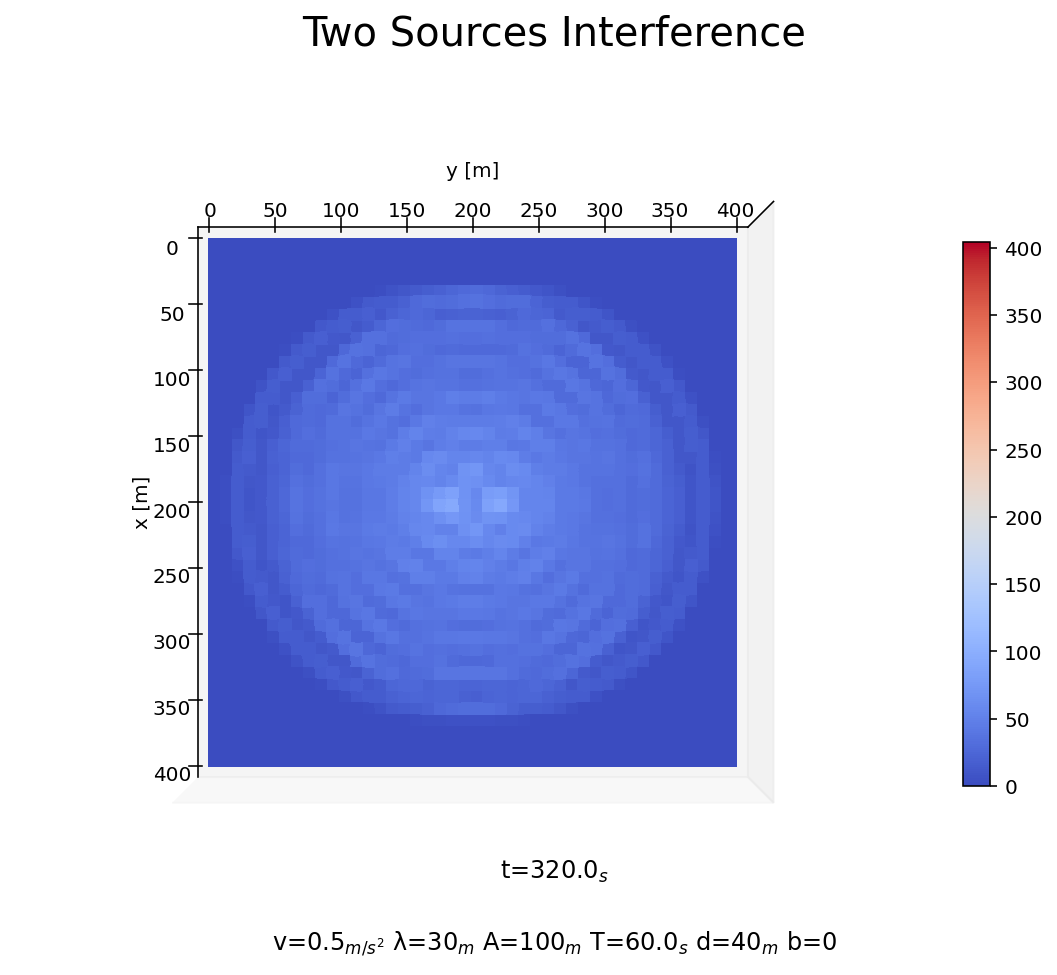

In [77]:
fig = plt.figure(figsize=(10, 10))
my_norm = colors.Normalize(vmin=np.amin(u), vmax=np.amax(u))
ax = plt.axes(projection="3d", xlim=(x0, xf), ylim=(y0, yf), zlim=(np.amin(u), np.amax(u)))
x_i, y_i = np.meshgrid(x, y)
line = ax.plot_surface(x_i, y_i, u[-1], cmap=cm.coolwarm, linewidth=0, antialiased=False, norm=my_norm)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zticks([])
ax.grid(False)
fig.colorbar(cm.ScalarMappable(norm=my_norm, cmap=cm.coolwarm), ax=ax, shrink=0.5)

fig.suptitle('Two Sources Interference', fontsize=20, y=0.85)
variables=f"v={v}$_{{{'m/s^2'}}}$ \u03BB={h}$_{{{'m'}}}$ A={A}$_{{{'m'}}}$ T={T}$_{{{'s'}}}$ d={d}$_{{{'m'}}}$ b={b}"
plt.figtext(0.5, 0.2, variables, wrap=True, horizontalalignment='center', fontsize=12)

time = f"t={t[-1]}$_{{{'s'}}}$"
plt.figtext(0.5, 0.25, time, wrap=True, horizontalalignment='center', fontsize=12)

ax.view_init(90, 0)
plt.show()

In [78]:
# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=M, interval=10, blit=True)
# anim.save('wave.mp4', fps=30, extra_args=('-vcodec', 'libx264'))
# plt.show()